# Age Prediction Using ResNet50

Dataset: [LINK](https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction)

Source: KGP Talkie

## Connecting the drive

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/dataset/

/content/drive/MyDrive/dataset


In [4]:
!mkdir age_classification

mkdir: cannot create directory ‘age_classification’: File exists


In [5]:
%cd age_classification

/content/drive/MyDrive/dataset/age_classification


In [6]:
!pwd

/content/drive/MyDrive/dataset/age_classification


## Preparing datasets

In [7]:
!git clone https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction.git

fatal: destination path 'Image-Dataset-for-Age-Prediction' already exists and is not an empty directory.


## Import modules

In [8]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 119kB/s 
     |████████████████████████████████| 6.8MB 40.9MB/s 
     |████████████████████████████████| 983kB 47.7MB/s 
     |████████████████████████████████| 266kB 50.0MB/s 
     |████████████████████████████████| 1.9MB 40.1MB/s 
     |████████████████████████████████| 1.2MB 45.5MB/s 
     |████████████████████████████████| 471kB 44.1MB/s 
     |████████████████████████████████| 901kB 35.2MB/s 
     |████████████████████████████████| 3.3MB 35.4MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.4-cp37-none-any.whl size=25282461 sha256=6cf264392de11c5816f93eaf295dc01c8b2456fa5ed314d9b476aeec665e8c92
  Stored in directory: /root/.cache/pip/wheels/95/cc/1b/84c3799864cd864b99d94a8aeac2ee2d928fb3d0ec3d3f1a13
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=b94a343368626385140e81f4a84d173e26bfdde07f8880ab3b318ed79c32235c
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7d

In [9]:
%matplotlib inline

from ktrain import vision as vis
import ktrain
import os
import re

In [10]:
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$'

p = re.compile(pattern)
r = p.search('10_0_0_20170110224223937.jpg')
print(r.group(1))

10


In [11]:
data = 'Image-Dataset-for-Age-Prediction/images'

In [12]:
(train_data, test_data, preprocess_data) = vis.images_from_fname(data, pattern = pattern,
                                                                is_regression = True,
                                                                random_state = 42)

/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for Image-Dataset-for-Age-Prediction/images/24_0_1_20170116220224657 .jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:692: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:591: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'either class_names argument was not supplied or is_regression=True. ' + \
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:692: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_r

['label']
      label
3286   21.0
4730   20.0
3932   23.0
6471   14.0
1606   25.0
['label']
      label
308    26.0
381    26.0
5716    1.0
2312   24.0
251    26.0
Found 6491 validated image filenames.
Found 722 validated image filenames.


In [13]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [14]:
model = vis.image_regression_model('pretrained_resnet50', 
                                    train_data = train_data,
                                    val_data = test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94773248/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [15]:
learner = ktrain.get_learner(model = model,
                             train_data = train_data,
                             val_data = test_data,
                             batch_size = 64)

Learning rate = 1e-4 (Default)

In [16]:
learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
102/102 [==============================] - 2121s 21s/step - loss: 129.7844 - mae: 7.9248 - val_loss: 58.0457 - val_mae: 4.4893
Epoch 2/2
102/102 [==============================] - 102s 1s/step - loss: 58.8990 - mae: 4.6222 - val_loss: 53.7628 - val_mae: 4.2176


In [17]:
learner.freeze(15)
learner.fit_onecycle(1e-4, 2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
102/102 [==============================] - 127s 1s/step - loss: 49.6179 - mae: 4.6086 - val_loss: 99.0629 - val_mae: 7.2874
Epoch 2/2
102/102 [==============================] - 116s 1s/step - loss: 25.7084 - mae: 3.4680 - val_loss: 53.9745 - val_mae: 4.7431


In [18]:
predictor = ktrain.get_predictor(learner.model, preprocess_data)

In [19]:
test_data.filenames[10:20]

['17_0_0_20170110231615651.jpg',
 '20_1_1_20170113005339990.jpg',
 '23_0_2_20170116172805150.jpg',
 '1_0_3_20161220223250813.jpg',
 '26_0_3_20170119180851092.jpg',
 '26_1_0_20170103180946896.jpg',
 '20_1_1_20170116164052068.jpg',
 '26_0_1_20170113174249954.jpg',
 '22_1_4_20161221195925096.jpg',
 '25_0_3_20170104220223342.jpg']

In [20]:
def show_prediction(fname):
  fname = data + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  vis.show_image(fname)
  print('Predicted Age: %s | Actual Age: %s' % (pred, actual))

Predicted Age: 15 | Actual Age: 16


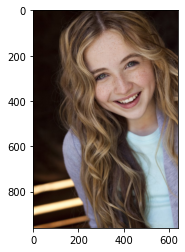

In [21]:
show_prediction('16_1_0_20170109213948727.jpg')

Predicted Age: 23 | Actual Age: 25


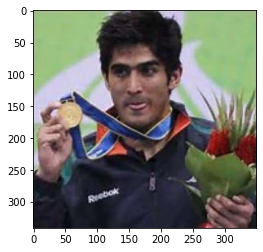

In [22]:
show_prediction('25_0_3_20170104220223342.jpg')

In [23]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


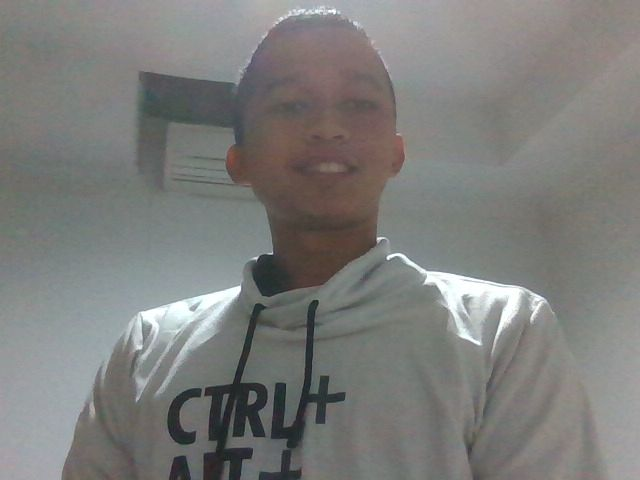

In [29]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [25]:
def real_prediction(fname):
  pred = round(predictor.predict_filename(fname)[0])
  vis.show_image(fname)
  print('Predicted Age: %s' % pred)

Predicted Age: 17


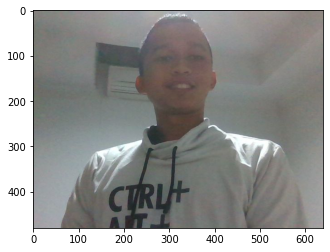

In [30]:
real_prediction('photo.jpg')

In [31]:
predictor.save('age_model')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [32]:
!zip -r age_model.zip  age_model

  adding: age_model/ (stored 0%)
  adding: age_model/tf_model.h5 (deflated 9%)
  adding: age_model/tf_model.preproc (deflated 41%)
